# <font color='scarlet'> CNN (CONVOLUTIONAL NEURAL NETWORK) FOR MALARIA DATA WITH TRANSFER LEARNING

## <font color='scarlet'> Project Overview  

This project leverages **Convolutional Neural Networks (CNN)** to detect infected and parasitized cells in microscopic medical images. The objective is to assist in diagnosing diseases like malaria and other infections characterized by parasitized cells. By automating the detection process, the model enhances diagnostic accuracy and efficiency, particularly in resource-limited settings where access to expert pathologists is challenging.  
 ### Key Features:  
- **Dataset:**  
  The model is trained on a curated dataset of labeled microscopic cell images, categorized as either infected/parasitized or healthy.  

- **Model Architecture:**  
  The model employs **VGG16**, a pre-trained CNN architecture, through **transfer learning**. This approach leverages the rich feature extraction capabilities of VGG16 while fine-tuning the model for the specific task of classifying infected and healthy cells.  

- **Preprocessing:**  
  Images were resized, normalized, and converted to RGB format to ensure compatibility with the VGG16 input requirements and improve the model's generalization to uns
een d ata.  

### Applications:  
This project has practical applications in healthcare diagnostics, particularly in combatting diseases like malaria where timely detection is critical. The methodology can also be adapted to other medical imaging tasks, such as detecting cancer cells or diagnosing other parasitic infections.  


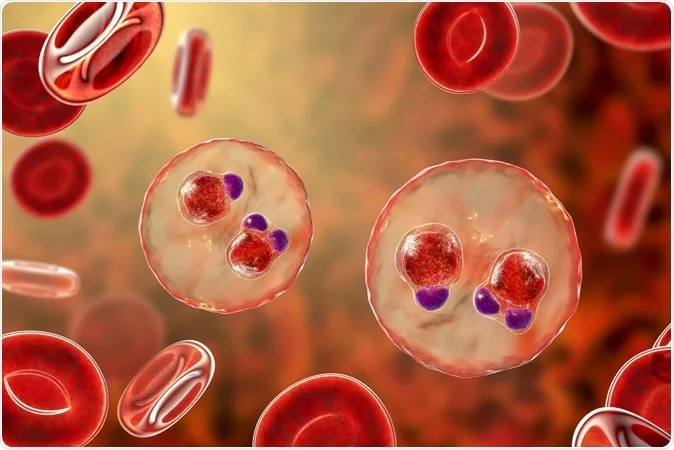
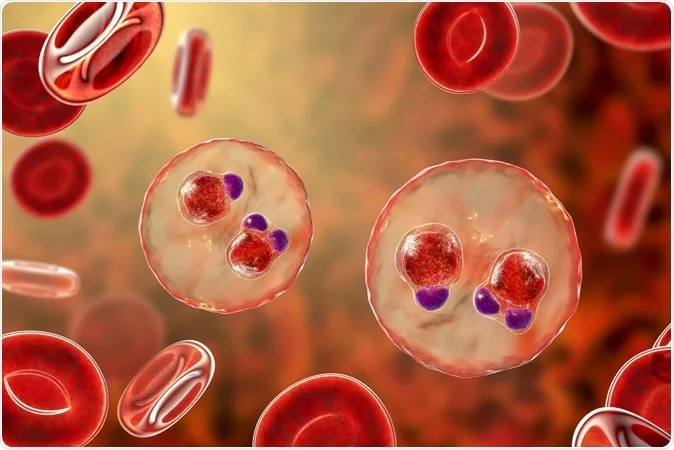

## <font color='scarlet'> Requirements

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

## <font color='scarlet'> Import Data

In [2]:
img_path='/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images'
os.listdir(img_path)

['Uninfected', 'Parasitized']

## <font color='scarlet'> Transfer Learning

In [3]:
data_dir='/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images'
img_width,img_height=224,224

datagen=ImageDataGenerator(rescale=1/225,validation_split=.2)
train_datagen=datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='binary',subset='validation')

base_model=VGG16(weights='imagenet',input_shape=(img_width,img_height,3),include_top=False)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model=Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
model.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1733864375.838147     105 service.cc:145] XLA service 0x7e0d640129b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733864375.838203     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1733864375.838210     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/689 ━━━━━━━━━━━━━━━━━━━━ 3:32:43 19s/step - accuracy: 0.3750 - loss: 0.7260

I0000 00:00:1733864390.265291     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


689/689 ━━━━━━━━━━━━━━━━━━━━ 225s 301ms/step - accuracy: 0.8360 - loss: 0.7010 - val_accuracy: 0.9152 - val_loss: 0.2062
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.9302 - loss: 0.1845 - val_accuracy: 0.8004 - val_loss: 0.6694
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.9381 - loss: 0.1656 - val_accuracy: 0.9272 - val_loss: 0.1889
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.9446 - loss: 0.1504 - val_accuracy: 0.9196 - val_loss: 0.2130
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.9507 - loss: 0.1374 - val_accuracy: 0.9289 - val_loss: 0.1806
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.9524 - loss: 0.1257 - val_accuracy: 0.9156 - val_loss: 0.2135
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.9583 - loss: 0.1138 - val_accuracy: 0.9294 - val_loss: 0.1805
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 122s 176ms/step - accuracy: 0.9604 - loss: 0.10

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,791,173 (350.16 MB)

 Trainable params: 25,692,161 (98.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 51,384,324 (196.02 MB)

## <font color='scarlet'> Overview of Model Result

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


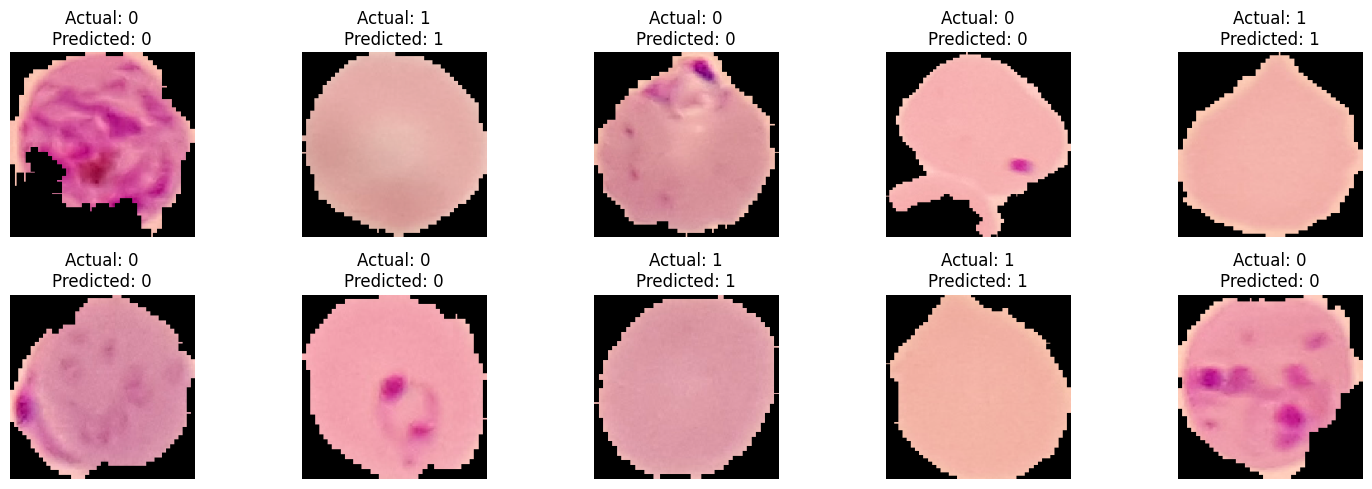

In [47]:
import matplotlib.pyplot as plt

num_samples = 10
x_sample, y_sample_true = next(test_datagen)  

x_sample = x_sample[:num_samples]
y_sample_true = y_sample_true[:num_samples]

y_sample_pred = (model.predict(x_sample) > 0.5).astype("int32").flatten()

plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_sample[i])  
    plt.axis('off')
    plt.title(f"Actual: {int(y_sample_true[i])}\nPredicted: {y_sample_pred[i]}")

plt.tight_layout()
plt.show()

## <font color='scarlet'> Testing the Model with Images (that is not on dataset)

In [42]:
def preprocess(path):
    img=cv2.imread(path)
    img=cv2.resize(img,(224,224))
    img=np.expand_dims(img,axis=0)
    img=np.array(img)
    img=preprocess_input(img)
    return img

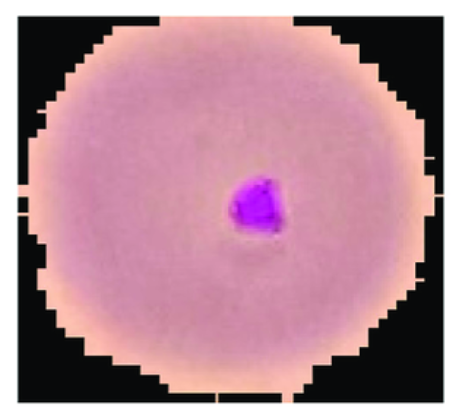

In [7]:
from IPython.display import Image
Image('/kaggle/input/test-data2/parasitized_cell.png')

In [43]:
img=preprocess('/kaggle/input/test-data2/parasitized_cell.png')
pred=model.predict(img)
if pred[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: Parasitized


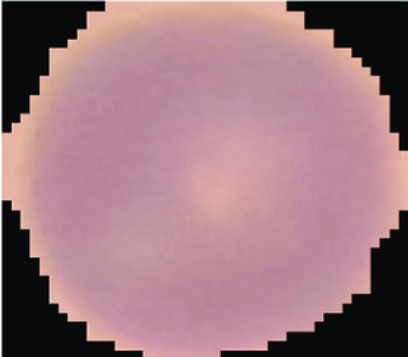

In [45]:
from IPython.display import Image
Image('/kaggle/input/test-data2/uninfected_cell.png')

In [46]:
img=preprocess('/kaggle/input/test-data2/uninfected_cell.png')
pred=model.predict(img)
if pred[0] > 0.5:
    print("Predicted: Uninfected")
else:
    print("Predicted: Parasitized")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: Uninfected
